<a href="https://colab.research.google.com/github/Thamy00Vic/Greenbank-telas/blob/main/Projeto_de_Classifica%C3%A7%C3%A3o_com_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados e Classificação com Naive Bayes
Nesta atividade, realizamos uma análise de dados utilizando a base de dados "Wine Quality". O objetivo é aplicar o algoritmo Naive Bayes para classificar a qualidade do vinho com base em suas características.

## 1. Carregar a Base de Dados
Vamos fazer o upload do arquivo CSV que contém os dados sobre a qualidade do vinho.

In [ ]:
from google.colab import files
uploaded = files.upload()

## 2. Carregar a Base de Dados
Agora, vamos carregar a base de dados em um DataFrame do Pandas.

In [7]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')

## 3. Análise Básica da Base
Vamos realizar uma análise inicial para entender o tamanho da base, as colunas e algumas métricas descritivas.

In [8]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [9]:
# Tamanho da base
print("Tamanho da base de dados:", data.shape)
# Listar colunas
print("Colunas da base de dados:", data.columns.tolist())
# Métricas descritivas
print(data.describe())
print(data.info())

Tamanho da base de dados: (1599, 12)
Colunas da base de dados: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000

## 4. Visualizações Gráficas
Vamos criar algumas visualizações para entender melhor a distribuição da qualidade do vinho e a relação entre características.

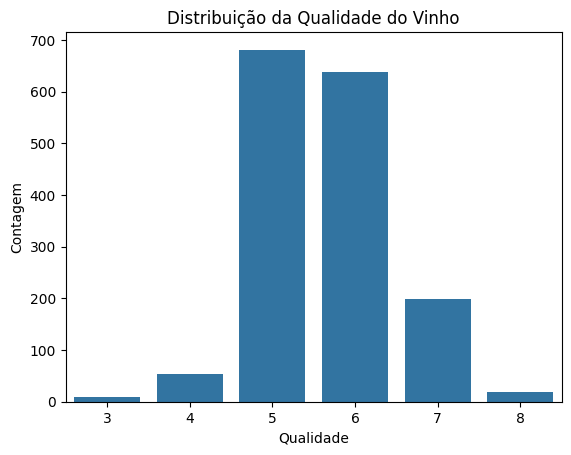

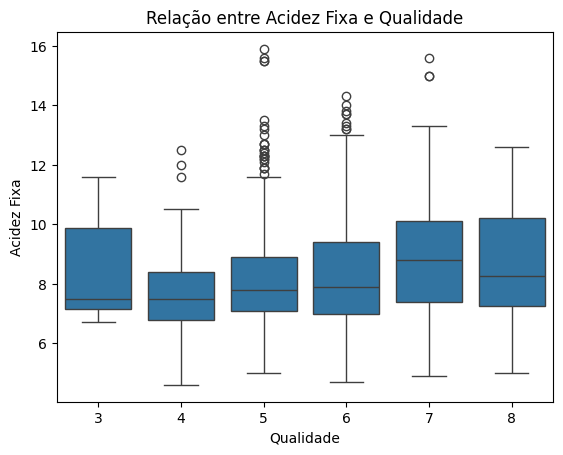

In [10]:
import matplotlib.pyplot as plt
import seaborn as snsvinho
sns.countplot(x='quality', data=data)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()
sns.boxplot(x='quality', y='fixed acidity', data=data)
plt.title('Relação entre Acidez Fixa e Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Acidez Fixa')
plt.show()

## 5. Pré-processamento dos Dados
Antes de aplicar o modelo, precisamos realizar o pré-processamento dos dados, que inclui o tratamento de valores nulos e a normalização das variáveis.

In [11]:
data = data.dropna()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] = scaler.fit_transform(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

## 6. Separar Treino e Teste
Vamos separar os dados em conjuntos de treino e teste para treinar o modelo e avaliar seu desempenho.

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Aplicar o Algoritmo Naive Bayes
Agora, vamos aplicar o algoritmo Naive Bayes para classificar a qualidade do vinho.

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 8. Avaliar a Performance do Modelo
Vamos calcular a acurácia do modelo para entender seu desempenho.

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Naive Bayes:", accuracy)

Acurácia do modelo Naive Bayes: 0.546875


## Conclusão
Nesta atividade, realizamos uma análise de dados da base "Wine Quality" e aplicamos o algoritmo Naive Bayes para classificar a qualidade do vinho. A acurácia obtida foi de 54,69%